In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
x=torch.arange(1,100,1)
y=3*x+5

In [4]:
x=x.unsqueeze(dim=1)
y=y.unsqueeze(dim=1)

In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=47,test_size=0.3)

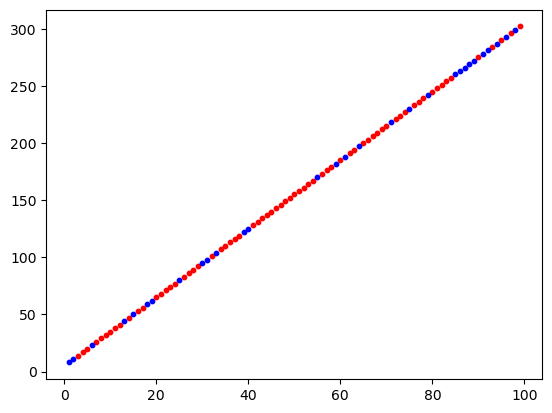

In [6]:
plt.scatter(X_train,Y_train,s=10,c='r')
plt.scatter(X_test,Y_test,s=10,c='b')

In [7]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight=nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))
        self.bias=nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))
        
    def forward(self,x: torch.Tensor) -> torch.Tensor:
        return self.weight*x+self.bias

In [8]:
torch.manual_seed(47)
lr=LinearRegression()

In [9]:
lr.state_dict()

OrderedDict([('weight', tensor([0.0530])), ('bias', tensor([0.0499]))])

In [10]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.Adam(params=lr.parameters())

In [11]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [12]:
epochs=3000
count=[]
test_loss_val=[]
train_loss_val=[]

for epoch in range(epochs):
    lr.train()
    train_pred=lr(X_train)
    train_loss=loss_fn(Y_train,train_pred)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
    train_loss_val.append(train_loss)
    
    lr.eval()
    with torch.inference_mode():
        test_pred=lr(X_test)
        test_loss=loss_fn(Y_test,test_pred)
        mae=mean_absolute_error(Y_test,test_pred)
        mse=mean_squared_error(Y_test,test_pred)
    test_loss_val.append(test_loss)
    
    if epoch%100==0:
        print(f"Epoch: {epoch:5d} || MAE: {mae:.10f} || MSE: {mse:.10f}")
        print(lr.state_dict(),"\n")

Epoch:     0 || MAE: 166.1908754153 || MSE: 36711.6856974669
OrderedDict([('weight', tensor([0.0540])), ('bias', tensor([0.0509]))]) 

Epoch:   100 || MAE: 160.6175329715 || MSE: 34283.4735417750
OrderedDict([('weight', tensor([0.1540])), ('bias', tensor([0.1509]))]) 

Epoch:   200 || MAE: 155.0441918552 || MSE: 31938.3396128808
OrderedDict([('weight', tensor([0.2540])), ('bias', tensor([0.2509]))]) 

Epoch:   300 || MAE: 149.4709305465 || MSE: 29676.3149907327
OrderedDict([('weight', tensor([0.3540])), ('bias', tensor([0.3509]))]) 

Epoch:   400 || MAE: 143.8976690471 || MSE: 27497.3655224636
OrderedDict([('weight', tensor([0.4540])), ('bias', tensor([0.4509]))]) 

Epoch:   500 || MAE: 138.3244057854 || MSE: 25401.4905399633
OrderedDict([('weight', tensor([0.5540])), ('bias', tensor([0.5509]))]) 

Epoch:   600 || MAE: 132.7511442860 || MSE: 23388.6914177355
OrderedDict([('weight', tensor([0.6540])), ('bias', tensor([0.6509]))]) 

Epoch:   700 || MAE: 127.1778818091 || MSE: 21458.96712

In [13]:
with torch.inference_mode():
    y_preds=lr(X_test)

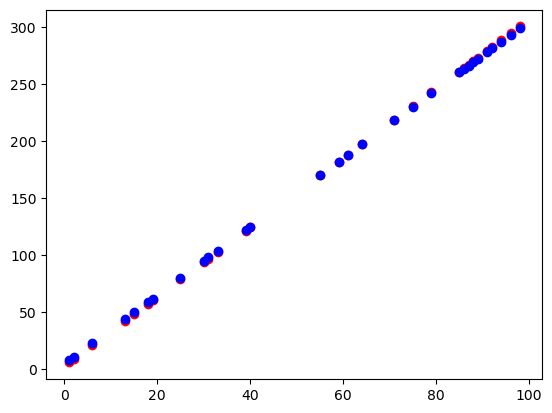

In [14]:
plt.scatter(X_test,y_preds,c='r')
plt.scatter(X_test,Y_test,c='b')

In [15]:
from pathlib import Path
path=Path("Linear")
path.mkdir(parents=True,exist_ok=True)

model_name="lrmodel_params.pth"
model_path=path/model_name
print(f"Saving file to: {model_path}")
torch.save(lr.state_dict(),f=model_path)

Saving file to: Linear/lrmodel_params.pth


In [16]:
lr.state_dict()

OrderedDict([('weight', tensor([3.0328])), ('bias', tensor([3.0378]))])

In [17]:
class Lasso(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight=nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))
        self.bias=nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))
        
    def forward(self,x: torch.Tensor) -> torch.Tensor:
        return self.bias*x+self.weight

In [18]:
lasso=Lasso()
lasso.state_dict()

OrderedDict([('weight', tensor([0.4677])), ('bias', tensor([0.8757]))])

In [19]:
lasso.load_state_dict(torch.load(f="Linear/lrmodel_params.pth"))

<All keys matched successfully>

In [20]:
lasso.state_dict()

OrderedDict([('weight', tensor([3.0328])), ('bias', tensor([3.0378]))])

In [21]:
l2_loss=nn.MSELoss()
adam=torch.optim.Adam(params=lasso.parameters())

In [22]:
X_train=X_train.to(torch.float)
X_test=X_test.to(torch.float)
Y_train=Y_train.to(torch.float)
Y_test=Y_test.to(torch.float)

In [23]:
epochs=500

for epoch in range(epochs):
    lasso.train()
    lasso_pred=lasso(X_train)
    loss=l2_loss(Y_train,lasso_pred)
    
    adam.zero_grad()
    loss.backward()
    adam.step()
    
    lasso.eval()
    with torch.inference_mode():
        test_pred=lasso(X_test)
        mae=mean_absolute_error(Y_test,test_pred)
        mse=mean_squared_error(Y_test,test_pred)
    if epoch%10==0:
        print(f"Epoch: {epoch} || MAE: {mae} || MSE: {mse}")
        print(lasso.state_dict(),"\n")

Epoch: 0 || MAE: 1.0863151550292969 || MSE: 1.4246833324432373
OrderedDict([('weight', tensor([3.0338])), ('bias', tensor([3.0368]))]) 

Epoch: 10 || MAE: 0.865774929523468 || MSE: 1.022925853729248
OrderedDict([('weight', tensor([3.0440])), ('bias', tensor([3.0293]))]) 

Epoch: 20 || MAE: 0.8963205814361572 || MSE: 1.0593106746673584
OrderedDict([('weight', tensor([3.0547])), ('bias', tensor([3.0307]))]) 

Epoch: 30 || MAE: 0.9238777160644531 || MSE: 1.0999385118484497
OrderedDict([('weight', tensor([3.0649])), ('bias', tensor([3.0319]))]) 

Epoch: 40 || MAE: 0.8839884996414185 || MSE: 1.0333174467086792
OrderedDict([('weight', tensor([3.0746])), ('bias', tensor([3.0303]))]) 

Epoch: 50 || MAE: 0.8930789828300476 || MSE: 1.042539358139038
OrderedDict([('weight', tensor([3.0847])), ('bias', tensor([3.0307]))]) 

Epoch: 60 || MAE: 0.8889685273170471 || MSE: 1.0325599908828735
OrderedDict([('weight', tensor([3.0946])), ('bias', tensor([3.0306]))]) 

Epoch: 70 || MAE: 0.8793153762817383 |

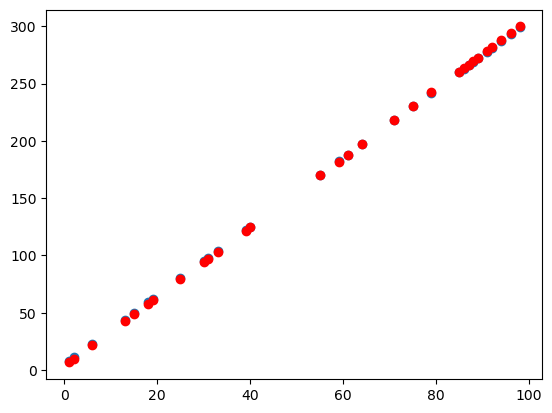

In [25]:
with torch.inference_mode():
    yhat=lasso(X_test)
    
plt.scatter(X_test,Y_test,label='')
plt.scatter(X_test,yhat,c='r')